# **A Simple Guide to Predicting House Prices Using Machine Learning**

## **1. Data Preparation**

In [1]:
# Importing necessary libraries
from google.colab import drive # Importing drive from google colab

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Mounting the Google Drive
drive.mount("/content/drive", force_remount=True)

# Defining the file path for the dataset
drive = "/content/drive/My Drive/"
input_dir = "Numpy_for_Numerical_Computing_&_Data_Analysis/data/input"
input_file_name = "sample_boston_house_price_dataset_1.1.csv"
sampe_data_file_path = drive+"//"+input_dir+"//"+input_file_name

# importing sample datat into pandas dataframe
data = pd.read_csv(sampe_data_file_path)

# displaying top 5 rows from dataframe
data.head()

Mounted at /content/drive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [2]:
# Displaying the shape of the dataset (rows and columns)
print(f"Shape of the dataset: {data.shape}\n")

# Displaying the column names of the dataset
print(f"Columns of the dataset: {data.columns}\n")

# Displaying a summary of the dataset, including data types and non-null counts
print("\nDataset Info:")
print(data.info())


Shape of the dataset: (509, 14)

Columns of the dataset: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       503 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      509 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      509 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      509 non-null    int64  
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    509 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.8 KB
None


In [3]:
# Checking the uniqueness of values in each column
unique_counts = data.nunique()
print("Number of unique values in each column:\n", unique_counts)


Number of unique values in each column:
 CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


In [4]:
# Checking for missing values in the dataset
print("Missing values before handling:\n", data.isnull().sum())

# Filling missing values with the median for ZN and INDUS columns
data['ZN'] = data['ZN'].fillna(data['ZN'].median())
data['INDUS'] = data['INDUS'].fillna(data['INDUS'].median())

# Verifying that all missing values have been handled
print("Missing values after handling:\n", data.isnull().sum())


Missing values before handling:
 CRIM       0
ZN         6
INDUS      2
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Missing values after handling:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# Display summary statistics
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean     3.592466   11.296660   11.160314    0.068762    0.554599    6.285403   
std      8.580477   23.269781    6.821497    0.253298    0.115603    0.701859   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.080140    0.000000    5.190000    0.000000    0.449000    5.887000   
50%      0.253560    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.673670   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean    68.608251    3.792276    9.500982  407.379175   18.464244  356.903124   
std     28.078041    2.1016

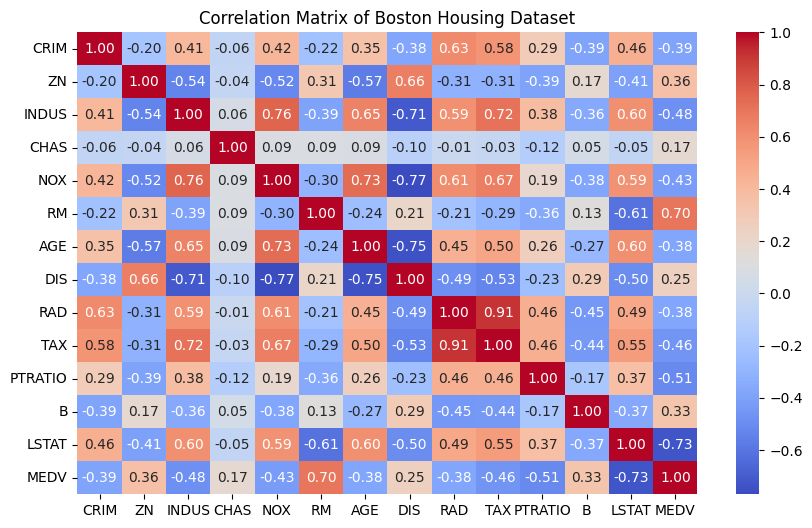

In [6]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 6))

# Calculating the correlation matrix for the dataset
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Adding a title to the heatmap for context
plt.title("Correlation Matrix of Boston Housing Dataset")

# Displaying the plot
plt.show()


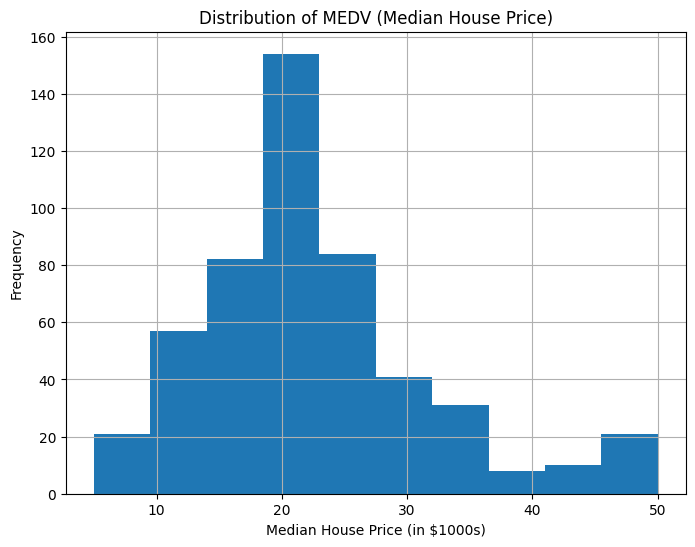

In [7]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt

# Setting the figure size for the histogram plot
plt.figure(figsize=(8, 6))

# Plotting the histogram for the target variable 'MEDV'
data['MEDV'].hist()

# Adding a title to provide context for the plot
plt.title('Distribution of MEDV (Median House Price)')

# Labeling the x-axis to indicate the target variable units
plt.xlabel('Median House Price (in $1000s)')

# Labeling the y-axis to indicate the frequency of house prices
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


## **2. Feature Engineering**

In [8]:
# Selecting significant features based on correlation and domain knowledge
features = ['CRIM', 'ZN', 'RM', 'LSTAT', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'CHAS']

# Adding new engineered features to the dataset
data['LSTAT_squared'] = data['LSTAT'] ** 2
data['RM_LSTAT_ratio'] = data['RM'] / (data['LSTAT'] + 1)

# Appending the engineered features to the features list
engineered_features = ['LSTAT_squared', 'RM_LSTAT_ratio']
features.extend(engineered_features)

print(f"feature list with new features = {features}")

# Splitting the Data and Scaling

# Separating predictors (X) and target (y)
X = data[features]
y = data['MEDV']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


feature list with new features = ['CRIM', 'ZN', 'RM', 'LSTAT', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'CHAS', 'LSTAT_squared', 'RM_LSTAT_ratio']


## **3. Model Selection**



In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()


##  **4. Training the Model**

In [10]:
# Train the model
model.fit(X_train_scaled, y_train)


LinearRegression()

## **5. Model Evaluation**

In [11]:
# Predictions on test data
y_pred = model.predict(X_test_scaled)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Calculate accuracy as 100 - MAPE
accuracy = 100 - mape
print("Model Accuracy:", accuracy, "%")


Mean Absolute Error (MAE): 3.256594733893618
Mean Squared Error (MSE): 21.159329555637783
Root Mean Squared Error (RMSE): 4.599927125035546
R-squared (R²): 0.7273812822240275
Mean Absolute Percentage Error (MAPE): 16.280615976961656 %
Model Accuracy: 83.71938402303834 %


## **6. Making Predictions**

In [12]:
# New data for prediction
new_data = pd.DataFrame({
    'CRIM': [0.1], 'ZN': [20], 'RM': [6], 'LSTAT': [4], 'AGE': [30],
    'RAD': [5], 'TAX': [300], 'PTRATIO': [15], 'B': [400], 'CHAS': [1]
})

# Add engineered features to new_data
new_data['LSTAT_squared'] = new_data['LSTAT'] ** 2
new_data['RM_LSTAT_ratio'] = new_data['RM'] / (new_data['LSTAT'] + 1)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict house price for the new data
predicted_price = model.predict(new_data_scaled)
print("Predicted house price (in $1000s):", predicted_price[0])

Predicted house price (in $1000s): 34.100189554268695
